## Data Information:
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

# Summary

# Opening .data files

In [2]:
#.data est pour nous des fichiers texte, représentants chacun une lettre  
#ainsi que sa représentation sous forme de vecteur de chiffres.

In [3]:
#https://www.pyimagesearch.com/2017/02/13/recognizing-digits-with-opencv-and-python/

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
f = open("./Data/letter-recognition.data", "r")

In [6]:
header = ["letter", "rec_1", "rec_2", "rec_3", "rec_4", "rec_5", "rec_6", "rec_7", "rec_8", "rec_9", "rec_10", "rec_11", "rec_12", "rec_13", "rec_14", "rec_15", "rec_16"]
df = pd.read_csv("./Data/letter-recognition.data", names = header)

In [7]:
#tail() = to see the last 5 rows in the dataset
df.tail()

,letter,rec_1,rec_2,rec_3,rec_4,rec_5,rec_6,rec_7,rec_8,rec_9,rec_10,rec_11,rec_12,rec_13,rec_14,rec_15,rec_16
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
rec_1     20000 non-null int64
rec_2     20000 non-null int64
rec_3     20000 non-null int64
rec_4     20000 non-null int64
rec_5     20000 non-null int64
rec_6     20000 non-null int64
rec_7     20000 non-null int64
rec_8     20000 non-null int64
rec_9     20000 non-null int64
rec_10    20000 non-null int64
rec_11    20000 non-null int64
rec_12    20000 non-null int64
rec_13    20000 non-null int64
rec_14    20000 non-null int64
rec_15    20000 non-null int64
rec_16    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [11]:
df['letter'].describe()

count     20000
unique       26
top           U
freq        813
Name: letter, dtype: object

# Colonnes

# Graphe A : Occurences de chaque lettre par ordre décroissant

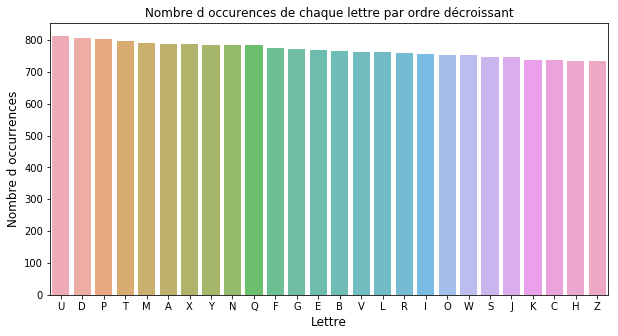

In [23]:
part_lettre = df['letter'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(part_lettre.index, part_lettre.values, alpha=0.8)
plt.title('Nombre d occurences de chaque lettre par ordre décroissant')
plt.ylabel('Nombre d occurrences', fontsize=12)
plt.xlabel('Lettre', fontsize=12)
plt.show()

# Graphe B : Position moyenne horizontale de la boite pour chaque lettre

In [61]:
list_letters = sorted(df['letter'].unique())
df_box_position = df.iloc[:, :-14].groupby('letter')
new_df = pd.DataFrame(columns=['letter', 'rec_1', 'rec_2'])
i = 0
for key, item in df_box_position:
    new_df = new_df.append({'letter' : list_letters[i], 'rec_1' : df_box_position.get_group(key).mean()['rec_1'], 'rec_2' : df_box_position.get_group(key).mean()['rec_2']}, ignore_index=True)
    i = i + 1

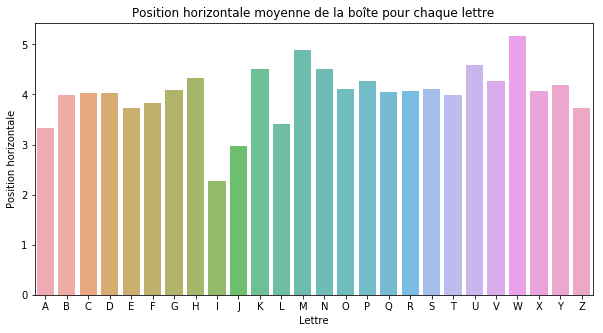

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_1'], alpha=0.8)
plt.title('Position horizontale moyenne de la boîte pour chaque lettre')
plt.xlabel('Lettre')
plt.ylabel('Position horizontale')
plt.show()

# Graphe C : Fréquence d'apparition des valeurs des positions horizontales des boîtes

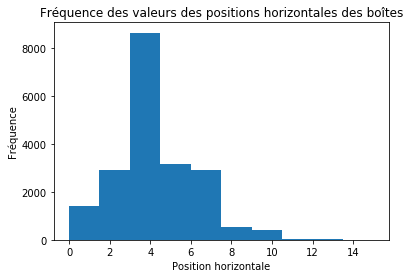

In [63]:
plt.hist(df['rec_1'])
plt.title('Fréquence des valeurs des positions horizontales des boîtes')
plt.xlabel('Position horizontale')
plt.ylabel('Fréquence')
plt.show()

# Graphe D : Position moyenne verticale de la boite pour chaque lettre

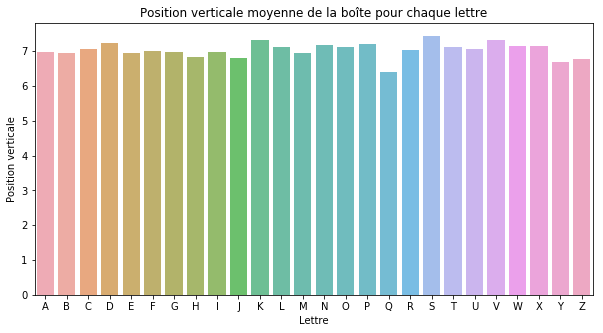

In [64]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_2'], alpha=0.8)
#plt.scatter(new_df['letter'], new_df['rec_2'])
plt.title('Position verticale moyenne de la boîte pour chaque lettre')
plt.xlabel('Lettre')
plt.ylabel('Position verticale')
plt.show()

# Graphe E : Fréquence d'apparition des valeurs des positions verticales des boîtes

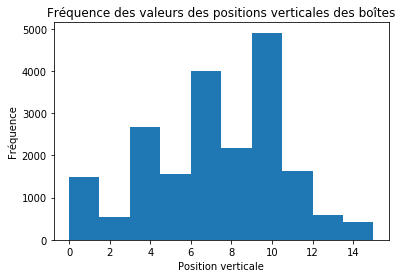

In [58]:
plt.hist(df['rec_2'])
plt.title('Fréquence des valeurs des positions verticales des boîtes')
plt.xlabel('Position verticale')
plt.ylabel('Fréquence')
plt.show()

# Graphe F : Fréquence du nombre total de pixels sur les images

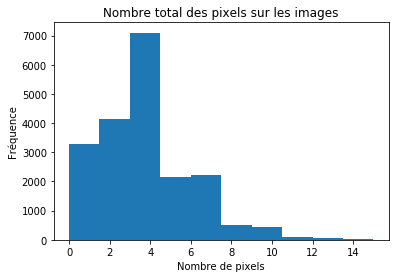

In [39]:
plt.hist(df['rec_5'])
plt.title('Fréquence du nombre total des pixels sur les images')
plt.xlabel('Nombre de pixels')
plt.ylabel('Fréquence')
plt.show()

# Graphe G : Fréquence du nombre total moyen de pixels sur les images par lettre

In [56]:
df_box_position = df.iloc[:, :-11].drop(columns=['rec_1', 'rec_2', 'rec_3', 'rec_4']).groupby('letter')
new_df = pd.DataFrame(columns=['letter', 'rec_5'])
i = 0
for key, item in df_box_position:
    new_df = new_df.append({'letter' : list_letters[i], 'rec_5' : df_box_position.get_group(key).mean()['rec_5']}, ignore_index=True)
    i = i + 1

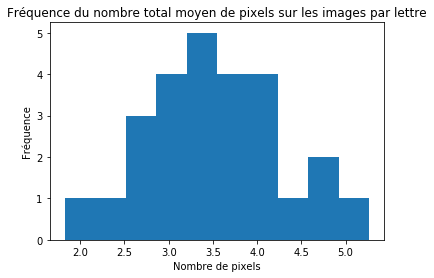

In [57]:
plt.hist(new_df['rec_5'])
plt.title('Fréquence du nombre total moyen de pixels sur les images par lettre')
plt.xlabel('Nombre de pixels')
plt.ylabel('Fréquence')
plt.show()

# Graphe H : Nombre total moyen de pixels sur les images par lettre

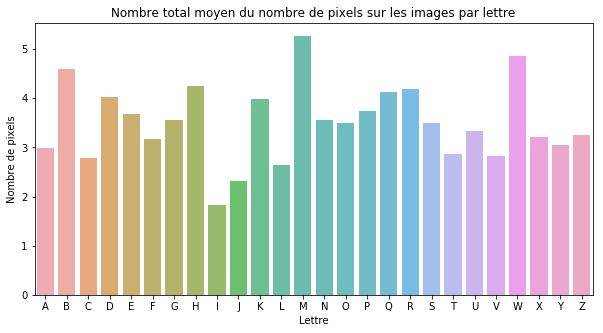

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_5'], alpha=0.8)
#plt.scatter(new_df['letter'], new_df['rec_2'])
plt.title('Nombre total moyen du nombre de pixels sur les images par lettre')
plt.xlabel('Lettre')
plt.ylabel('Nombre de pixels')
plt.show()

# Graphe I : Fréquence de la valeur quadratique moyenne des distances horizontales

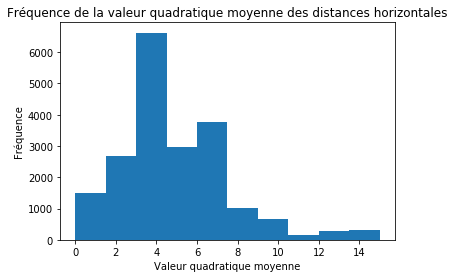

In [54]:
plt.hist(df['rec_8'])
plt.title('Fréquence de la valeur quadratique moyenne des distances horizontales')
plt.xlabel('Valeur quadratique moyenne')
plt.ylabel('Fréquence')
plt.show()

# Graphe J : Fréquence de la valeur quadratique moyenne des distances horizontales par lettre

In [66]:
df_box_position = df.iloc[:, :-7].drop(columns=['rec_1', 'rec_2', 'rec_3', 'rec_4', 'rec_5', 'rec_6', 'rec_7']).groupby('letter')
new_df = pd.DataFrame(columns=['letter', 'rec_8', 'rec_9'])
i = 0
for key, item in df_box_position:
    new_df = new_df.append({'letter' : list_letters[i], 'rec_8' : df_box_position.get_group(key).mean()['rec_8'], 'rec_9' : df_box_position.get_group(key).mean()['rec_9']}, ignore_index=True)
    i = i + 1

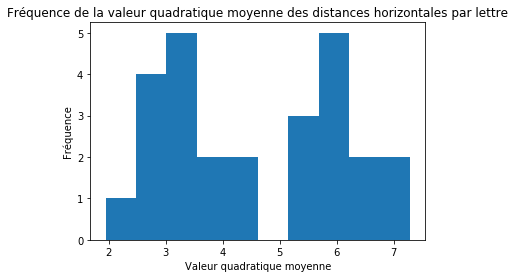

In [67]:
plt.hist(new_df['rec_8'])
plt.title('Fréquence de la valeur quadratique moyenne des distances horizontales par lettre')
plt.xlabel('Valeur quadratique moyenne')
plt.ylabel('Fréquence')
plt.show()

# Graphe K : Valeur quadratique moyenne des distances horizontales par lettre

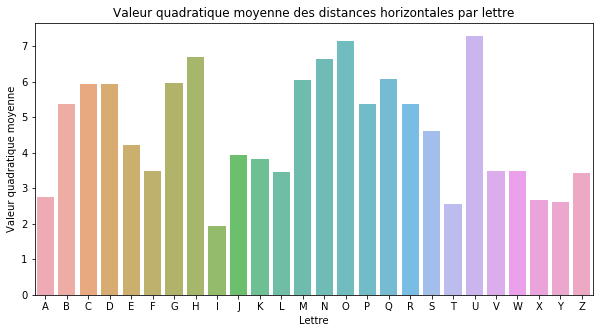

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_8'], alpha=0.8)
plt.title('Valeur quadratique moyenne des distances horizontales par lettre')
plt.xlabel('Lettre')
plt.ylabel('Valeur quadratique moyenne')
plt.show()

# Graphe L : Fréquence de la valeur quadratique moyenne des distances verticales

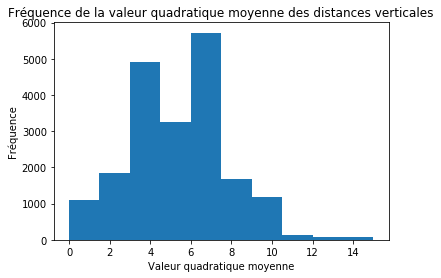

In [69]:
plt.hist(df['rec_9'])
plt.title('Fréquence de la valeur quadratique moyenne des distances verticales')
plt.xlabel('Valeur quadratique moyenne')
plt.ylabel('Fréquence')
plt.show()

# Graphe M : Fréquence de la valeur quadratique moyenne des distances verticales par lettre

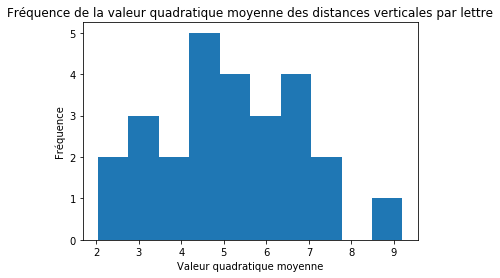

In [70]:
plt.hist(new_df['rec_9'])
plt.title('Fréquence de la valeur quadratique moyenne des distances verticales par lettre')
plt.xlabel('Valeur quadratique moyenne')
plt.ylabel('Fréquence')
plt.show()

# Graphe N : Valeur quadratique moyenne des distances verticales par lettre

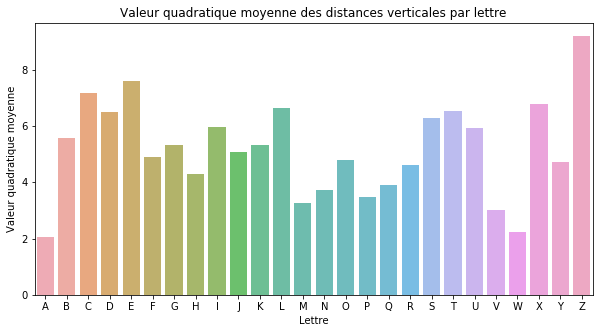

In [71]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_9'], alpha=0.8)
plt.title('Valeur quadratique moyenne des distances verticales par lettre')
plt.xlabel('Lettre')
plt.ylabel('Valeur quadratique moyenne')
plt.show()

# Graphe O : Fréquence du nombre moyen de bords rencontrés aux positions verticales par lettre

In [72]:
df_box_position = df.iloc[:, :-1].drop(columns=['rec_1', 'rec_2', 'rec_3', 'rec_4', 'rec_5', 'rec_6', 'rec_7', 'rec_8', 'rec_9', 'rec_10', 'rec_11', 'rec_12', 'rec_14']).groupby('letter')
new_df = pd.DataFrame(columns=['letter', 'rec_13', 'rec_15'])
i = 0
for key, item in df_box_position:
    new_df = new_df.append({'letter' : list_letters[i], 'rec_13' : df_box_position.get_group(key).mean()['rec_13'], 'rec_15' : df_box_position.get_group(key).mean()['rec_15']}, ignore_index=True)
    i = i + 1

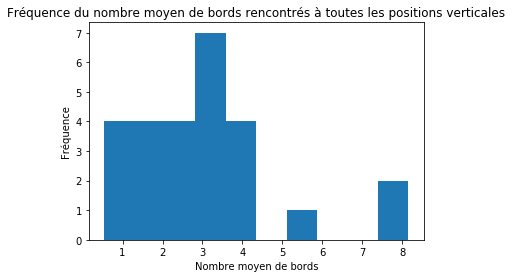

In [73]:
plt.hist(new_df['rec_13'])
plt.title('Fréquence du nombre moyen de bords rencontrés à toutes les positions verticales')
plt.xlabel('Nombre moyen de bords')
plt.ylabel('Fréquence')
plt.show()

# Graphe P : Nombre moyen de bords rencontrés aux positions verticales par lettre

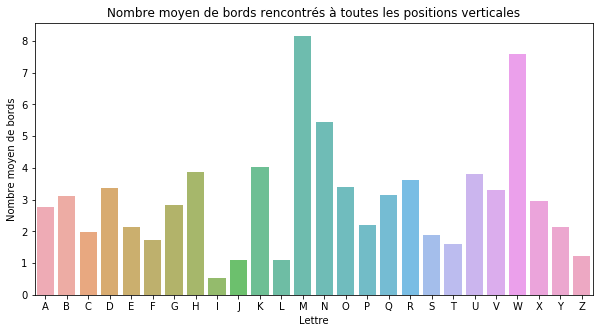

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_13'], alpha=0.8)
plt.title('Nombre moyen de bords rencontrés à toutes les positions verticales')
plt.xlabel('Lettre')
plt.ylabel('Nombre moyen de bords')
plt.show()

# Graphe Q : Fréquence du nombre moyen de bords rencontrés aux positions horizontales par lettre

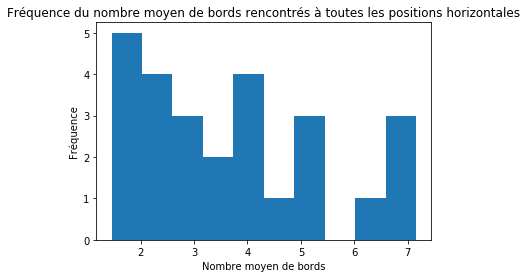

In [74]:
plt.hist(new_df['rec_15'])
plt.title('Fréquence du nombre moyen de bords rencontrés à toutes les positions horizontales')
plt.xlabel('Nombre moyen de bords')
plt.ylabel('Fréquence')
plt.show()

# Graphe R : Nombre moyen de bords rencontrés aux positions horizontales par lettre

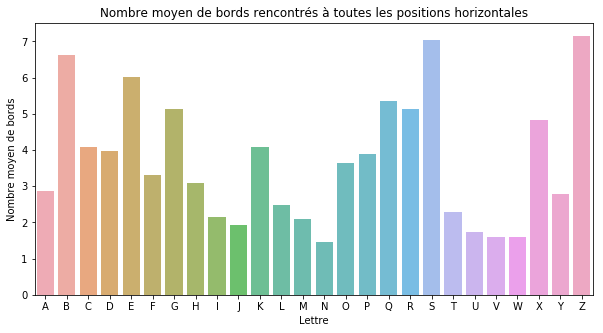

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(new_df['letter'], new_df['rec_15'], alpha=0.8)
plt.title('Nombre moyen de bords rencontrés à toutes les positions horizontales')
plt.xlabel('Lettre')
plt.ylabel('Nombre moyen de bords')
plt.show()